In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Variables with short description

<b>id</b>:	                    Unique ID for every Customer

<b>account_type</b>: 	        Account Type – current or saving

<b>gender</b>:      	        Gender of customer

<b>age</b>:         	        Age of customer

<b>region_code</b>: 	        Code assigned to region of residence (has order)

<b>cc_cons_apr</b>: 	        Credit card spend in April

<b>dc_cons_apr</b>:    	        Debit card spend in April

<b>cc_cons_may</b>: 	        Credit card spend in May

<b>dc_cons_may</b>: 	        Debit card spend in May

<b>cc_cons_jun</b>: 	        Credit card spend in June

<b>dc_cons_jun</b>: 	        Debit card spend in June

<b>cc_count_apr</b>:	        Number of credit card transactions in April

<b>cc_count_may</b>:	        Number of credit card transactions in May

<b>cc_count_jun</b>: 	        Number of credit card transactions in June

<b>dc_count_apr</b>:	        Number of debit card transactions in April

<b>dc_count_may</b>:	        Number of debit card transactions in May

<b>dc_count_jun</b>:	        Number of debit card transactions in June

<b>card_lim</b>:    	        Maximum Credit Card Limit allocated

<b>personal_loan_active</b>:	Active personal loan with other bank

<b>vehicle_loan_active</b>: 	Active Vehicle loan with other bank

<b>personal_loan_closed</b>:	Closed personal loan in last 12 months

<b>vehicle_loan_closed</b>: 	Closed vehicle loan in last 12 months

<b>investment_1</b>:        	DEMAT investment in june

<b>investment_2</b>:        	fixed deposit investment in june

<b>investment_3</b>:        	Life Insurance investment in June

<b>investment_4</b>:        	General Insurance Investment in June

<b>debit_amount_apr</b>:    	Total amount debited for April

<b>credit_amount_apr</b>:   	Total amount credited for April

<b>debit_count_apr</b>:     	Total number of times amount debited in april

<b>credit_count_apr</b>:    	Total number of times amount credited in april

<b>max_credit_amount_apr</b>:	Maximum amount credited in April

<b>debit_amount_may</b>:    	Total amount debited for May

<b>credit_amount_may</b>:   	Total amount credited for May

<b>credit_count_may</b>:    	Total number of times amount credited in May

<b>debit_count_may</b>:     	Total number of times amount debited in May

<b>max_credit_amount_may</b>:  	Maximum amount credited in May

<b>debit_amount_jun</b>:    	Total amount debited for June

<b>credit_amount_jun</b>:   	Total amount credited for June

<b>credit_count_jun</b>:    	Total number of times amount credited in June

<b>debit_count_jun</b>:     	Total number of times amount debited in June

<b>max_credit_amount_jun</b>:	Maximum amount credited in June

<b>loan_enq</b>:             	Loan enquiry in last 3 months

<b>emi_active</b>:          	Monthly EMI paid to other bank for active loans

<b>cc_cons</b>:             	(Target) Average Credit Card Spend in next three months

In [2]:
os.chdir("D:\\Data Science\\Amex Hackathon\\train")
train = pd.read_csv('train.csv', na_values = [' '], keep_default_na = True, na_filter = True)

In [3]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
train.shape

(32820, 44)

In [5]:
os.chdir("D:\\Data Science\\Amex Hackathon")
test = pd.read_csv('test.csv', na_values = [' '], keep_default_na = True, na_filter = True)

In [6]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [7]:
test.shape

(14067, 43)

## Handling missing values

In [8]:
train.isna().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [9]:
train.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [10]:
train.shape

(32820, 44)

Total no. of rows = 32,820. So, we can <b>drop columns</b> that contains more than 30,000 na values

In [11]:
train.drop(['personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = 1, inplace = True)

In [12]:
train.fillna(train.mean(), inplace = True)

In [13]:
train.isna().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
cc_cons                  0
dtype: int64

### Now let's follow above steps for test dataset

In [14]:
test.shape

(14067, 43)

In [15]:
test.isna().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr               8230
cc_cons_may                  0
dc_cons_may               7375
cc_cons_jun                  0
dc_cons_jun               9064
cc_count_apr              1038
cc_count_may               542
cc_count_jun               634
dc_count_apr              8230
dc_count_may              7375
dc_count_jun              6552
card_lim                     3
personal_loan_active     12933
vehicle_loan_active      13712
personal_loan_closed     12808
vehicle_loan_closed      13386
investment_1             13417
investment_2             13040
investment_3             13453
investment_4             13894
debit_amount_apr           847
credit_amount_apr         1465
debit_count_apr            788
credit_count_apr           788
max_credit_amount_apr     1465
debit_amount_may          1001
credit_a

In [16]:
test.drop(['personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = 1, inplace = True)

In [17]:
test.fillna(test.mean(), inplace = True)

In [18]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,saving,M,36,447,17942.70,1170.000000,1656.00,5691.616269,4551.00,...,15416.520000,3.000000,7.000000,10000.000000,17316.44000,5154.000000,2.000000,8.000000,5000.000000,0.00
1,43223,current,M,31,233,44870.36,5553.625266,34177.00,5691.616269,25889.21,...,77598.987697,4.133789,13.969704,48388.190527,72342.31325,71200.599636,5.836863,15.963689,42305.241682,0.00
2,45502,current,M,26,823,1073.00,2442.000000,4141.00,390.000000,6740.29,...,65227.000000,4.000000,22.000000,26926.000000,33981.00000,37762.000000,3.000000,15.000000,29352.000000,2885.82
3,12368,current,M,39,878,33060.58,5553.625266,3797.12,5691.616269,291.00,...,63393.000000,4.000000,8.000000,57185.000000,52927.00000,89425.000000,7.000000,11.000000,32696.000000,0.00
4,40415,current,M,44,404,18236.90,5553.625266,30513.30,5691.616269,20395.28,...,45120.000000,1.000000,5.000000,45000.000000,31656.69000,34275.000000,3.000000,4.000000,19000.000000,3342.58


In [19]:
test.isna().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
dtype: int64

In [20]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)

train.shape:  (32820, 35)
test.shape:  (14067, 34)


# EDA: Plotting

### Creating new variables for plotting

Creating 4 new columns for <b>total credit card spend of 3 months</b>, <b>total debit card spend of 3 months</b>, <b>total credit amount for 3 months</b> and <b>total debit amount for 3 months</b>

In [21]:
train['total_credit_spend_3months'] = train['cc_cons_apr'] + train['cc_cons_may'] + train['cc_cons_jun'] 

In [22]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months
0,23334,saving,M,63,305,7695.00,5727.615837,479.00,5635.506904,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435,8796.00
1,20329,current,M,33,326,52702.00,988.720000,29873.00,5635.506904,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,83662.00
2,17679,current,M,44,264,10800.49,3215.520000,21659.64,1607.000000,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,33628.13
3,16428,saving,M,44,233,20936.00,5727.615837,2094.00,5635.506904,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,34808.50
4,18721,saving,F,35,324,1183.83,5727.615837,3656.29,5635.506904,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,5785.12


In [23]:
train['total_debit_spend_3months'] = train['dc_cons_apr'] + train['dc_cons_may'] + train['dc_cons_jun'] 

In [24]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months,total_debit_spend_3months
0,23334,saving,M,63,305,7695.00,5727.615837,479.00,5635.506904,622.0,...,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435,8796.00,16029.836161
1,20329,current,M,33,326,52702.00,988.720000,29873.00,5635.506904,1087.0,...,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,83662.00,9430.466904
2,17679,current,M,44,264,10800.49,3215.520000,21659.64,1607.000000,1168.0,...,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,33628.13,5177.520000
3,16428,saving,M,44,233,20936.00,5727.615837,2094.00,5635.506904,11778.5,...,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,34808.50,16029.836161
4,18721,saving,F,35,324,1183.83,5727.615837,3656.29,5635.506904,945.0,...,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,5785.12,16029.836161


Creating similar parameters for <b>credit and debit amounts</b> and also <b>counts</b>

In [25]:
train['total_credit_amount_3months'] = train['credit_amount_apr'] + train['credit_amount_may'] + train['credit_amount_jun'] 

In [26]:
train['total_debit_amount_3months'] = train['debit_amount_apr'] + train['debit_amount_may'] + train['debit_amount_jun'] 

In [27]:
train['total_credit_count_3months'] = train['credit_count_apr'] + train['credit_count_may'] + train['credit_count_jun'] 

In [28]:
train['total_debit_count_3months'] = train['debit_count_apr'] + train['debit_count_may'] + train['debit_count_jun'] 

In [29]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months,total_debit_spend_3months,total_credit_amount_3months,total_debit_amount_3months,total_credit_count_3months,total_debit_count_3months
0,23334,saving,M,63,305,7695.00,5727.615837,479.00,5635.506904,622.0,...,3.0,470.0,0.00,435,8796.00,16029.836161,165790.37,96161.54,11.0,8.0
1,20329,current,M,33,326,52702.00,988.720000,29873.00,5635.506904,1087.0,...,19.0,27000.0,4963.33,1921,83662.00,9430.466904,399808.00,384191.27,23.0,49.0
2,17679,current,M,44,264,10800.49,3215.520000,21659.64,1607.000000,1168.0,...,19.0,20800.0,0.00,1970,33628.13,5177.520000,91290.91,113594.55,12.0,42.0
3,16428,saving,M,44,233,20936.00,5727.615837,2094.00,5635.506904,11778.5,...,1.0,5300.0,1238.18,21579,34808.50,16029.836161,29367.00,26768.86,5.0,4.0
4,18721,saving,F,35,324,1183.83,5727.615837,3656.29,5635.506904,945.0,...,4.0,45000.0,0.00,1814,5785.12,16029.836161,66948.00,40101.05,7.0,13.0


<b>Since, we are going to use these new features in the test dataset, let's add them there too

In [30]:
test['total_credit_spend_3months'] = test['cc_cons_apr'] + test['cc_cons_may'] + test['cc_cons_jun'] 

In [31]:
test['total_debit_spend_3months'] = test['dc_cons_apr'] + test['dc_cons_may'] + test['dc_cons_jun'] 

In [32]:
test['total_credit_amount_3months'] = test['credit_amount_apr'] + test['credit_amount_may'] + test['credit_amount_jun'] 

In [33]:
test['total_debit_amount_3months'] = test['debit_amount_apr'] + test['debit_amount_may'] + test['debit_amount_jun'] 

In [34]:
test['total_credit_count_3months'] = test['credit_count_apr'] + test['credit_count_may'] + test['credit_count_jun'] 

In [35]:
test['total_debit_count_3months'] = test['debit_count_apr'] + test['debit_count_may'] + test['debit_count_jun'] 

In [36]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,total_credit_spend_3months,total_debit_spend_3months,total_credit_amount_3months,total_debit_amount_3months,total_credit_count_3months,total_debit_count_3months
0,6975,saving,M,36,447,17942.70,1170.000000,1656.00,5691.616269,4551.00,...,2.000000,8.000000,5000.000000,0.00,24149.70,11459.362305,45849.52000,49653.710000,7.000000,22.000000
1,43223,current,M,31,233,44870.36,5553.625266,34177.00,5691.616269,25889.21,...,5.836863,15.963689,42305.241682,0.00,104936.57,15842.987571,222812.34668,208262.285939,13.794433,44.953952
2,45502,current,M,26,823,1073.00,2442.000000,4141.00,390.000000,6740.29,...,3.000000,15.000000,29352.000000,2885.82,11954.29,3474.000000,208802.00000,207498.700000,12.000000,70.000000
3,12368,current,M,39,878,33060.58,5553.625266,3797.12,5691.616269,291.00,...,7.000000,11.000000,32696.000000,0.00,37148.70,15842.987571,212458.00000,182968.550000,16.000000,23.000000
4,40415,current,M,44,404,18236.90,5553.625266,30513.30,5691.616269,20395.28,...,3.000000,4.000000,19000.000000,3342.58,69145.48,15842.987571,104549.00000,96964.040000,5.000000,13.000000


### Age v/s avg. credit spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


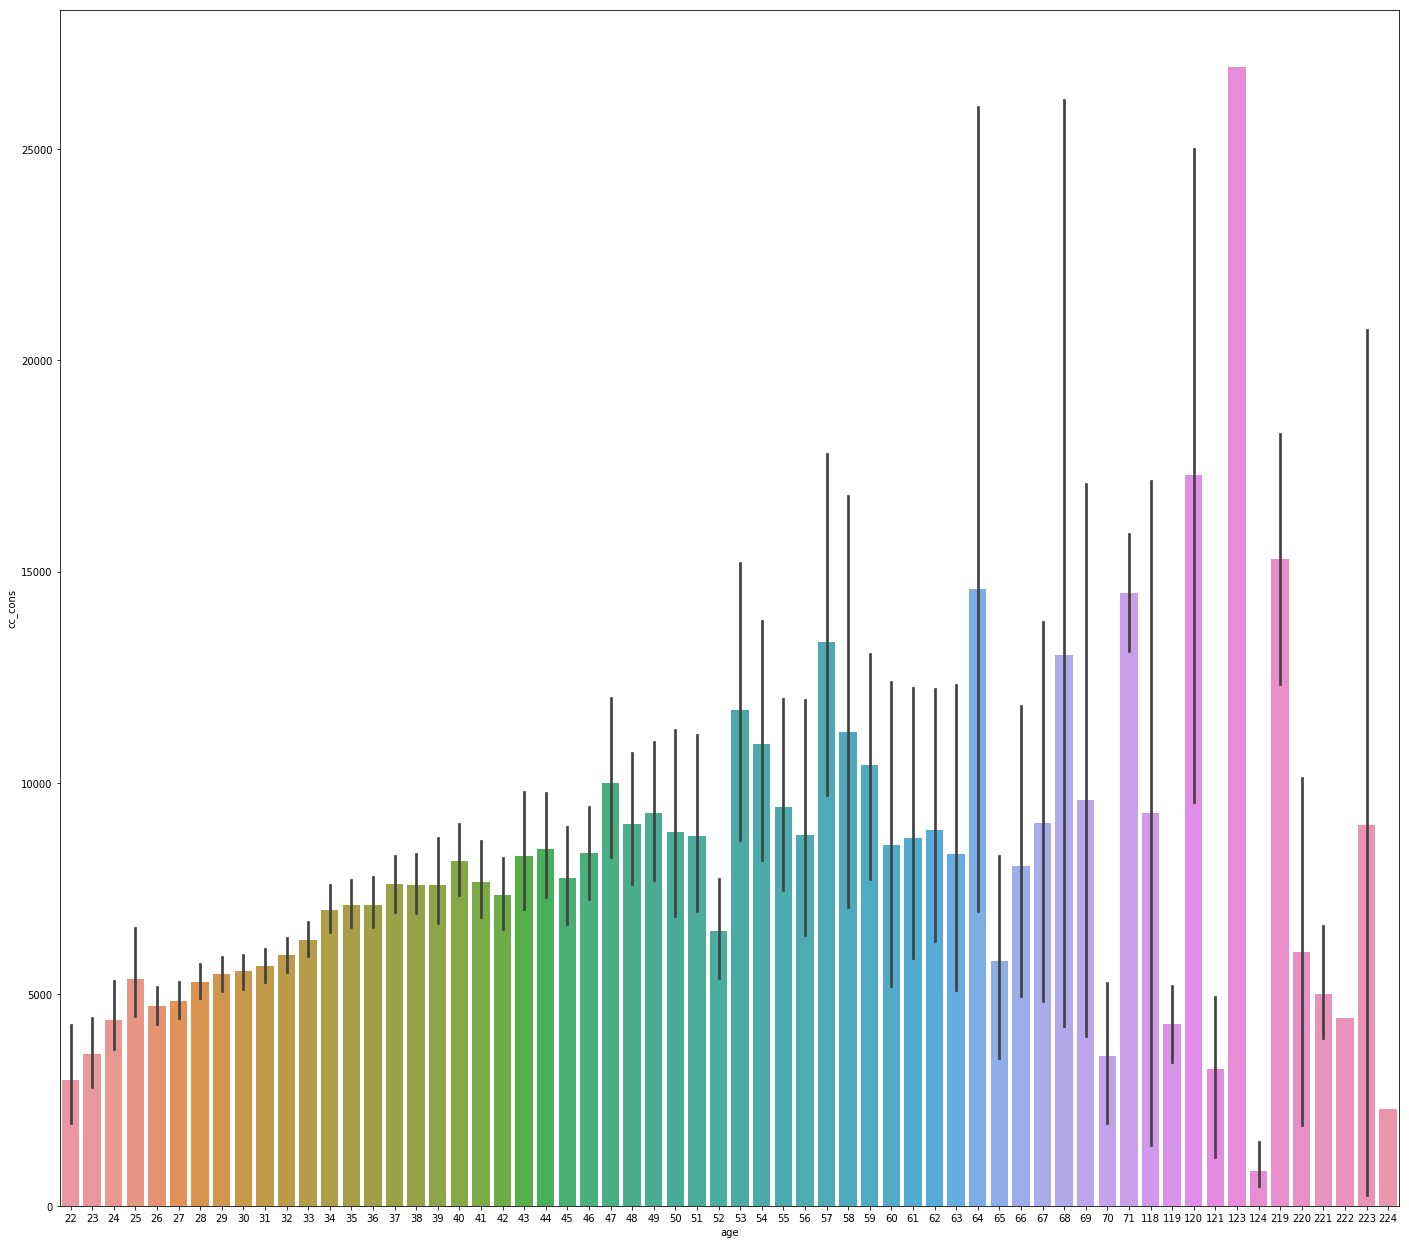

In [37]:
fig, ax = plt.subplots(figsize = (24, 22))
sns.barplot('age','cc_cons', data = train, ax = ax)

Since, there is <b>tremendous variation</b> in <b>avg credit card spend</b> due to <b>age</b>. Hence, age becomes an important parameter for modelling

### Account type v/s avg. credit spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


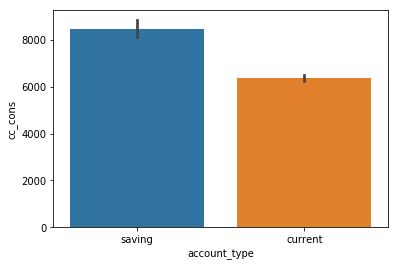

In [38]:
sns.barplot('account_type','cc_cons', data = train)

Let's do a scatter plot of <b>total credit spend </b> and <b>total debit spend</b> for last 3 months with avg credit spend in next 3 months

### Credit spend for last 3 months v/s avg. credit spend of next 3 months

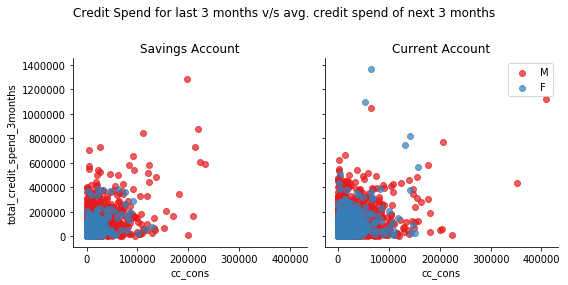

In [39]:
g = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g.map(plt.scatter, 'cc_cons', 'total_credit_spend_3months', alpha = 0.7)

g.axes[-1].legend()

plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Credit Spend for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

plt.show()

### Debit Spend for last 3 months v/s avg. credit spend of next 3 months

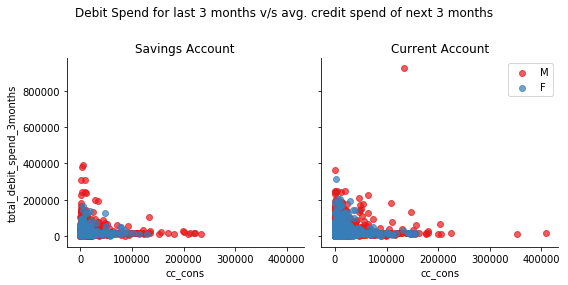

In [40]:
g1 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g1.map(plt.scatter, 'cc_cons', 'total_debit_spend_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g1.fig.suptitle('Debit Spend for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g1.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g1.axes[-1].legend()
plt.show()

Scatter plots show relationship b/w the parameters hence they become important for modeling

### Plotting for credit amounts v/s avg. credit spend for next three months

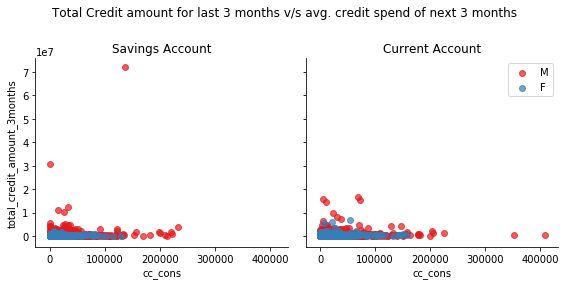

In [41]:
g2 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g2.map(plt.scatter, 'cc_cons', 'total_credit_amount_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g2.fig.suptitle('Total Credit amount for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g2.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g2.axes[-1].legend()
plt.show()

Total credit amount v/s cc_cons show a non-linear relationship. 

### Plotting for debit amounts v/s avg. credit spend for next three months

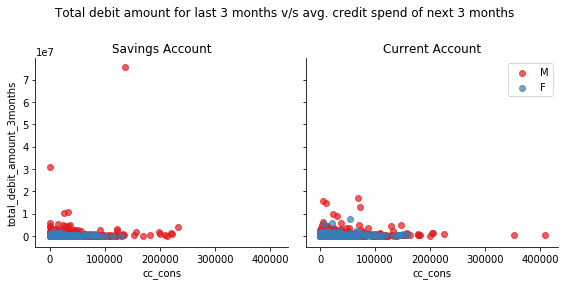

In [42]:
g3 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g3.map(plt.scatter, 'cc_cons', 'total_debit_amount_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g3.fig.suptitle('Total debit amount for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g3.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g3.axes[-1].legend()
plt.show()

Similarly, even debit amount v/s cc_cons follows a non-linear relationship

### Plotting for credit counts v/s avg. credit spend for next three months

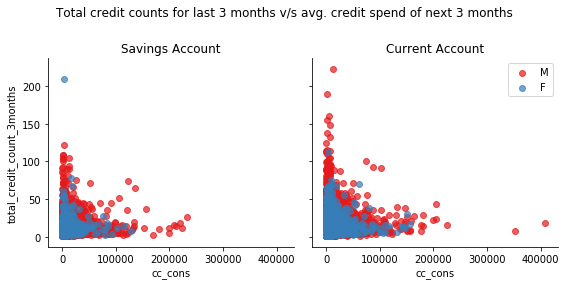

In [43]:
g4 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g4.map(plt.scatter, 'cc_cons', 'total_credit_count_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g4.fig.suptitle('Total credit counts for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g4.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g4.axes[-1].legend()
plt.show()

A <b>linear relationship</b> can be observed b/w the parameters: total credit count v/s avg. spend for next 3 months

### Plotting for debit counts v/s avg. credit spend for next three months

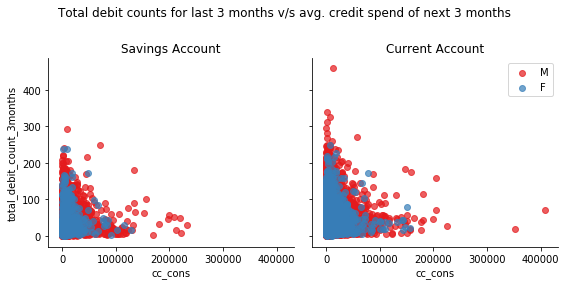

In [44]:
g5 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g5.map(plt.scatter, 'cc_cons', 'total_debit_count_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g5.fig.suptitle('Total debit counts for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g5.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g5.axes[-1].legend()
plt.show()

Similarly, a <b>linear relationship</b> can also be observed b/w the parameters: total debit count v/s avg. spend for next 3 months

### Plotting card limit v/s avg. spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


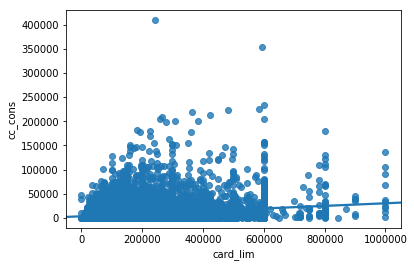

In [45]:
sns.regplot(x = 'card_lim', y = 'cc_cons', data = train)

In [46]:
train[["card_lim", "cc_cons"]].corr()

,card_lim,cc_cons
card_lim,1.000000,0.265348
cc_cons,0.265348,1.000000


### Plotting emi active v/s avg. spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


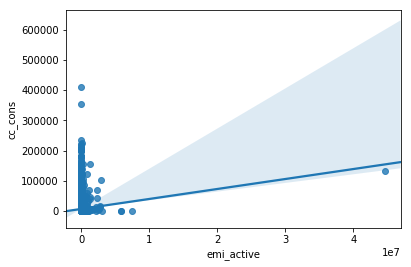

In [47]:
sns.regplot(x = 'emi_active', y = 'cc_cons', data = train)

In [48]:
train[["emi_active", "cc_cons"]].corr()

,emi_active,cc_cons
emi_active,1.00000,0.06934
cc_cons,0.06934,1.00000


# Modeling

### Preparing train and test data

<b>Let's merge train and test

In [49]:
data = pd.concat([train, test], ignore_index=True)

In [50]:
data.head()

,account_type,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,...,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code,total_credit_amount_3months,total_credit_count_3months,total_credit_spend_3months,total_debit_amount_3months,total_debit_count_3months,total_debit_spend_3months
0,saving,63,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,...,50000.0,470.0,45000.0,305,165790.37,11.0,8796.00,96161.54,8.0,16029.836161
1,current,33,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,...,70000.0,27000.0,150000.0,326,399808.00,23.0,83662.00,384191.27,49.0,9430.466904
2,current,44,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,...,11700.0,20800.0,13800.0,264,91290.91,12.0,33628.13,113594.55,42.0,5177.520000
3,saving,44,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,...,2000.0,5300.0,19300.0,233,29367.00,5.0,34808.50,26768.86,4.0,16029.836161
4,saving,35,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,...,10000.0,45000.0,3000.0,324,66948.00,7.0,5785.12,40101.05,13.0,16029.836161


In [51]:
data.columns

Index(['account_type', 'age', 'card_lim', 'cc_cons', 'cc_cons_apr',
       'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
       'cc_count_may', 'credit_amount_apr', 'credit_amount_jun',
       'credit_amount_may', 'credit_count_apr', 'credit_count_jun',
       'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may',
       'dc_count_apr', 'dc_count_jun', 'dc_count_may', 'debit_amount_apr',
       'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
       'debit_count_jun', 'debit_count_may', 'emi_active', 'gender', 'id',
       'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'region_code', 'total_credit_amount_3months',
       'total_credit_count_3months', 'total_credit_spend_3months',
       'total_debit_amount_3months', 'total_debit_count_3months',
       'total_debit_spend_3months'],
      dtype='object')

#### Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [52]:
data_onehot = data[['gender','account_type']]

In [53]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)

In [54]:
enc.fit(data_onehot)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [55]:
data_onehot_transformed = enc.transform(data_onehot)

Converting the returned array into a DF

In [56]:
data2 = pd.DataFrame(data_onehot_transformed, columns = ['Male', 'Female', 'Savings_account','Current_account'])

In [57]:
data2.head()

,Male,Female,Savings_account,Current_account
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0


In [58]:
data = pd.concat([data, data2], axis = 1)

In [59]:
data.head()

,account_type,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,...,total_credit_amount_3months,total_credit_count_3months,total_credit_spend_3months,total_debit_amount_3months,total_debit_count_3months,total_debit_spend_3months,Male,Female,Savings_account,Current_account
0,saving,63,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,...,165790.37,11.0,8796.00,96161.54,8.0,16029.836161,0.0,1.0,0.0,1.0
1,current,33,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,...,399808.00,23.0,83662.00,384191.27,49.0,9430.466904,0.0,1.0,1.0,0.0
2,current,44,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,...,91290.91,12.0,33628.13,113594.55,42.0,5177.520000,0.0,1.0,1.0,0.0
3,saving,44,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,...,29367.00,5.0,34808.50,26768.86,4.0,16029.836161,0.0,1.0,0.0,1.0
4,saving,35,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,...,66948.00,7.0,5785.12,40101.05,13.0,16029.836161,1.0,0.0,0.0,1.0


Let's drop unrequired columns

In [60]:
data.drop(['gender','account_type'], axis = 1, inplace = True)

In [61]:
data.columns

Index(['age', 'card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun',
       'cc_cons_may', 'cc_count_apr', 'cc_count_jun', 'cc_count_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'credit_count_apr', 'credit_count_jun', 'credit_count_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr',
       'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun',
       'debit_amount_may', 'debit_count_apr', 'debit_count_jun',
       'debit_count_may', 'emi_active', 'id', 'max_credit_amount_apr',
       'max_credit_amount_jun', 'max_credit_amount_may', 'region_code',
       'total_credit_amount_3months', 'total_credit_count_3months',
       'total_credit_spend_3months', 'total_debit_amount_3months',
       'total_debit_count_3months', 'total_debit_spend_3months', 'Male',
       'Female', 'Savings_account', 'Current_account'],
      dtype='object')

<b>Features Selection

In [62]:
y = data['cc_cons']
y.head()

0      435.0
1     1921.0
2     1970.0
3    21579.0
4     1814.0
Name: cc_cons, dtype: float64

In [63]:
Feature = data.drop('cc_cons', axis = 1)

In [64]:
X = Feature

In [65]:
X.head()

,age,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,...,total_credit_amount_3months,total_credit_count_3months,total_credit_spend_3months,total_debit_amount_3months,total_debit_count_3months,total_debit_spend_3months,Male,Female,Savings_account,Current_account
0,63,150000.0,7695.00,622.0,479.00,2.0,3.0,1.0,50259.0,1279.37,...,165790.37,11.0,8796.00,96161.54,8.0,16029.836161,0.0,1.0,0.0,1.0
1,33,176000.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,169812.0,55390.00,...,399808.00,23.0,83662.00,384191.27,49.0,9430.466904,0.0,1.0,1.0,0.0
2,44,65000.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,38942.0,29297.91,...,91290.91,12.0,33628.13,113594.55,42.0,5177.520000,0.0,1.0,1.0,0.0
3,44,600000.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,2294.0,7544.00,...,29367.00,5.0,34808.50,26768.86,4.0,16029.836161,0.0,1.0,0.0,1.0
4,35,100000.0,1183.83,945.0,3656.29,2.0,9.0,7.0,10271.0,53483.00,...,66948.00,7.0,5785.12,40101.05,13.0,16029.836161,1.0,0.0,0.0,1.0


### Train-Test split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 32820, shuffle = False, random_state=4 )

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32820, 42) (32820,)
Test set: (14067, 42) (14067,)


# Modeling

Let's import y_test values

In [68]:
y_test = pd.read_csv('sample_submission.csv', usecols = ['cc_cons'])

In [69]:
y_test.isna().sum() 

cc_cons    0
dtype: int64

# 1. Polynomial Regression

Since, we have multiple features to predict values of "Credit spend in next 3 months", we have to use <b>Polynomial regression

In [70]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2, include_bias = False)), ('linear', LinearRegression(fit_intercept=False))]

In [71]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [72]:
pipe.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [73]:
ypred = pipe.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [74]:
ypred[0:10]

array([ 3641.3125    , 13395.37597656,  1909.40478516,  6246.12597656,
        7016.87548828,  6965.32397461,  5449.36376953,  4766.55566406,
       12636.87451172,  2225.23242188])

# 2. Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from sklearn.metrics import meansquaredlogerror np.sqrt(meansquaredlogerror(y_test, predictions))

In [78]:
ridge = Ridge()
parameters = np.linspace(0.1, 20, 0.5)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [79]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=array([], dtype=float64), pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [80]:
ridge_regressor.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 5, got 0)

In [ ]:
print(ridge_regressor.best_param_)
print(ridge_regressor.best_score_)

RMSLE - Root Mean Squared Log Error .
This metric is used when the Target variable is converted into Log(Target).
so instead of looking at RMSLE, you can look for RMSE (generally we use this). You can convert the predictions to ypred = exp(predictions) 
and then np.sqrt(meansquarederror(y_test, ypred)) will give the final RMSE.

# 3. Lasso Regression

In [94]:
lasso = Lasso()
parameters = np.linspace(0.1, 20, 0.5)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [96]:
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 5, got 0)

# 4. Decision Tree Regressor